# Exploratory Analysis over 120 years of Olympic History

In this task, a guided exploration over the Olympic History dataset has been conducted, using some of the most common exploration/aggregation/descriptive operations. 
Visualization libraries have been used to identify patterns in data for analysing the data.

## Dataset Details

Here, EDA has been performed on '120 years of Olympic History dataset'. Specifically, on athlete_events.csv file from kaggle repository (https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results). The file athlete_events.csv contains 271,116 rows and 15 columns. This dataset begins with the 1896 Athens, Greece Olympics, and runs up to the 2016 Rio, Brazil Olympic Games. Each row corresponds to an athlete competing in an individual Olympic event. The columns of the data-set are:

- ID - Unique number for each athlete
- Name - Athlete's name
- Sex - M or F
- Age - Integer
- Height - In centimeters
- Weight - In kilograms
- Team - Team name
- NOC - National Olympic Committee 3-letter code
- Games - Year and season
- Year - Integer
- Season - Summer or Winter
- City - Host city
- Sport - Sport
- Event - Event
- Medal - Gold, Silver, Bronze, or NA

## Required Python Packages
The following packages imported below for this task.

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np
#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Dataset
The Python code below reads the Olympic History dataset into a Pandas data frame with the name df_Olympic. 
For this code to work, the file 'athlete_events.csv' must be in the same folder as this file.

In [2]:
#read the csv file into a Pandas data frame
df_olympics = pd.read_csv('athlete_events.csv', encoding='latin1')

#return the first 5 rows of the dataset
df_olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


#  Statistical Exploratory Data Analysis
Let us start with getting to know the dataset. Got some basic information by using Pandas features.

In [8]:
#Printing the details of the df_olympics data frame (information such as number of rows,columns, name of columns, etc)
print (">>Task 1-a: Details of df_olympics data frame are: \n",df_olympics.shape, df_olympics.columns, df_olympics.index,
                    df_olympics.info(), df_olympics.count() ) 


#Finding the number of rows and columns in the df_olympics data frame.
num_rows = df_olympics.shape[0]
num_cols = df_olympics.shape[1]
print ("\n\n>> Number of rows:%s and number of columns:%s" % (num_rows, num_cols)) 


#Printing the descriptive detail (min, max, quartiles etc) for 'Age' column of  the df_olympics
print ("\n\n>>Descriptive details of age column are\n",df_olympics.Age.describe())


#Printing the number of years from the first game until the last in our data-set, and the number of  unique values for 'games'.
num_tot_years  = df_olympics['Year'].max()- df_olympics['Year'].min()
num_uniq_games = df_olympics['Games'].nunique()
print ("\n\n >>In our dataset we have historical data for %s years, and for %s games. " % (num_tot_years, num_uniq_games))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
>>Task 1-a: Details of df_olympics data frame are: 
 (271116, 15) Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object') RangeIndex(start=0, stop=271116, step=1) None ID        271116
Name      271116
Sex       271116
Age  

# Aggregation & Filtering & Rank
In this task, some very high level aggregation and filtering operations have been performed. 
Then,ranking has been applied on the results of some tasks . 
Pandas has a convenient and powerful syntax for aggregation, filtering, and ranking. 

In [10]:
#Finding the total number of female and male athletes that participated on the 2004 Olympics Games

df1= df_olympics[(df_olympics.Year== 2004) & (df_olympics.Sex== 'F')].count()
df2= df_olympics[(df_olympics.Year== 2004) & (df_olympics.Sex== 'M')].count()
num_female_2004 = df1['Sex']
num_male_2004   = df2['Sex']
print (">>At the Olympics of 2004, there were participating %s female and %s male athletes" 
       % (num_female_2004, num_male_2004))


# Finding the total number of awarded metals for the year 1896, and the year 2016.
#Utilize the property of cell's missing values
g_1896= df_olympics[(df_olympics.Year== 1896) & (df_olympics.Medal== 'Gold')].count()
s_1896= df_olympics[(df_olympics.Year== 1896) & (df_olympics.Medal== 'Silver')].count()
b_1896= df_olympics[(df_olympics.Year== 1896) & (df_olympics.Medal== 'Silver')].count()
g_2016= df_olympics[(df_olympics.Year== 2016) & (df_olympics.Medal== 'Gold')].count()
s_2016= df_olympics[(df_olympics.Year== 2016) & (df_olympics.Medal== 'Silver')].count()
b_2016= df_olympics[(df_olympics.Year== 2016) & (df_olympics.Medal== 'Silver')].count()

num_medals_1896 = g_1896['Medal']+ s_1896['Medal']+ b_1896['Medal']
num_medals_2016 = g_2016['Medal']+ s_2016['Medal']+ b_2016['Medal']

print ("\n\n>> The total number of metals awarded in 1896 was %s, while in 2016 was %s" 
       % (num_medals_1896, num_medals_2016))


#Finding the top 10 athletes with the most gold medals for all years.
only_g= df_olympics[df_olympics.Medal=='Gold']
only_g_names= only_g['Name']
no_of_golds= only_g_names.value_counts()
top10_gold_athletes=no_of_golds.head(10)
print ("\n\n>> The top 10 athletes for all years are: \n%s" % (top10_gold_athletes))



>>At the Olympics of 2004, there were participating 5546 female and 7897 male athletes


>> The total number of metals awarded in 1896 was 148, while in 2016 was 1975


>> The top 10 athletes for all years are: 
Michael Fred Phelps, II                            23
Raymond Clarence "Ray" Ewry                        10
Frederick Carlton "Carl" Lewis                      9
Mark Andrew Spitz                                   9
Paavo Johannes Nurmi                                9
Larysa Semenivna Latynina (Diriy-)                  9
Ole Einar Bjrndalen                                 8
Birgit Fischer-Schmidt                              8
Sawao Kato                                          8
Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)     8
Name: Name, dtype: int64


#  Visualization
In this task, a number of visualization tasks have been performed to get some intuition about the data. Visualization is a key component of exploration.

Text(0.5,1,'Top-10 tallest athletes')

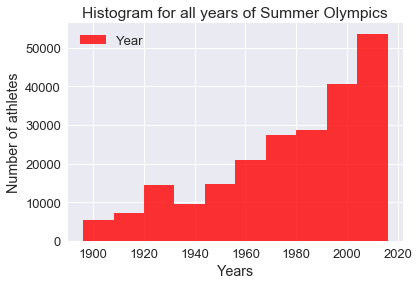

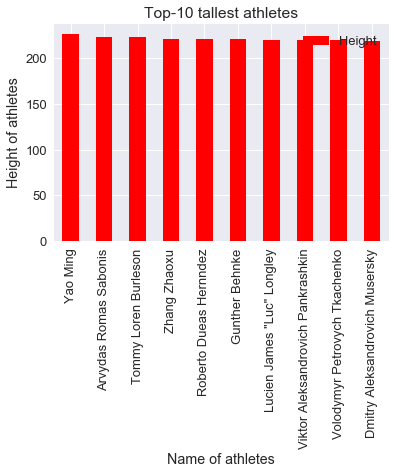

In [11]:
sns.set_style('whitegrid')
sns.set(font_scale = 1.3)


# Drawing a histogram for total number of athletes participated in all Summer Olympic Games. 
So= df_olympics[df_olympics.Season=='Summer']
So.plot.hist(y='Year', bins= 10, color='red', alpha=0.8)
plt.title('Histogram for all years of Summer Olympics')
plt.xlabel('Years')
plt.ylabel('Number of athletes')




# Drawing a "vertical" bar chart that lists the top-10 talest althletes for all years.
Tallest=df_olympics[df_olympics.Height>0]
Top_ten = Tallest.pivot_table(index='Name', values='Height')
Top_ten_athletes= Top_ten.sort_values('Height', ascending= False)
Vertical_tallest= Top_ten_athletes.head(10)
Vertical_tallest.plot(kind='bar', y= 'Height', color='red')
plt.xlabel('Name of athletes')
plt.ylabel('Height of athletes')
plt.title('Top-10 tallest athletes')
           

# Finding an 'interesting' information from the Olympic History    dataset and creating a visualization for it with a reasoning. 

'Explanation:The horizontal bar plot shows the top 15 countries with most number of medals.USA is at top with 5637 medals and URS(Soviet Union) is at second position with 2503 medals. \n'

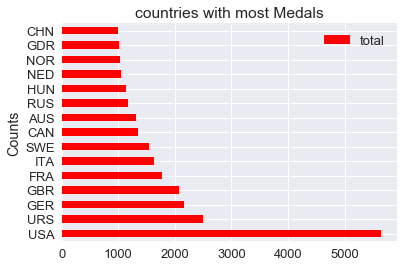

In [14]:
counted= df_olympics.pivot_table(index='NOC', values= 'Name', columns='Medal', aggfunc='count')
counted['total']= counted.sum(axis='columns')
counted= counted.sort_values('total', ascending=False)
top_countries= counted.head(15)
top_countries.plot(kind='barh', y= 'total', color='red')
plt.title('countries with most Medals')
plt.ylabel('Counts')


'''Explanation:The horizontal bar plot shows the top 15 countries with most number of medals.USA is at top with 5637 medals and URS(Soviet Union) is at second position with 2503 medals. 
'''